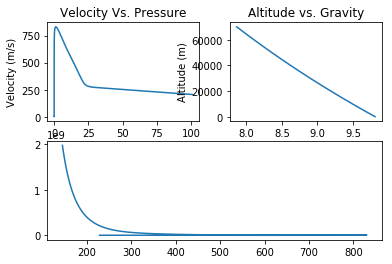

8427


In [75]:
import csv
import random
import cmath as math
import matplotlib.pyplot as plt
from matplotlib import style

# Set up constant variables
ship_mass = 477.49999165535 # kg
spec_gas_const = 286.9 # J / (kg * k)
crossArea = math.pi/4 * 0.625**2.0
body_mu = 3.5315984*10**12 # m^3/s^2

# Initialize readin variables
time = []
altitude = []
velocity = []
acceleration = []
pressure = []
temperature = []
gravity = []
density = []
dragForce = []
gravity = []
dragCoefficient = []

# Read in values for variables

with open('mylog.csv','r') as mylog:
    csv_reader = csv.DictReader(mylog)
    
    next(csv_reader)
    
    for line in csv_reader:
        time.append(float(line['time']))
        altitude.append(float(line['altitude']))
        velocity.append(float(line['velocity']))
        acceleration.append(float(line['acc']))
        gravity.append(float(line['grav']))
        pressure.append(float(line['pres']))
        temperature.append(float(line['temp']))
        
time_zero = time[0]

for its in range(len(time)):
    time[its] = time[its] - time_zero
    density.append(pressure[its] / (temperature[its] * spec_gas_const))
    dragForce.append(ship_mass * (gravity[its] - acceleration[its]))
    if density[its] * velocity[its] > 0:
        dragCoefficient.append(2 * dragForce[its] / (density[its] * velocity[its] * crossArea))
    else:
        dragCoefficient.append(1)
        
    


fig = plt.figure()

# add_subplot syntax:
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

# x,y = create_plots()
# ax1.plot(x,y)

ax1.plot(pressure, velocity)
ax1.set_xlabel('pressure (kPa)')
ax1.set_ylabel('Velocity (m/s)')
ax1.set_title('Velocity Vs. Pressure')

ax2.plot(gravity, altitude)
ax2.set_xlabel('gravity (m/s^2)')
ax2.set_ylabel('Altitude (m)')
ax2.set_title('Altitude vs. Gravity')

ax3.plot(velocity[1000:8000], dragCoefficient[1000:8000])
# ax3.set_ylabel('Force Drag (N)')
# ax3.set_xlabel('Density (kg/m^3)')
# ax3.set_title('density versus drag force')

plt.show()
print(len(time))
